# Two Hidden Layer Neural Network


- Implementing a 2-class classification neural network with a two hidden layer
- Using units with a non-linear activation function, such as tanh/sigmoid / relu 
- Computeing the cross entropy loss 
- Implementing forward and backward propagation


## 1 - Packages ##

Let's first import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.

In [221]:
# Package imports
import numpy as np
import pandas as pd
import random
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


import sklearn.linear_model
%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## 2 - Dataset ##

First, let's get the dataset you will work on. The following code will load a "flower" 2-class dataset into variables `X` and `Y`.

In [193]:
dir(sklearn.datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_svmlight_format',
 'base',
 'california_housing',
 'clear_data_home',
 'covtype',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_mldata',
 'fetch_olivetti_faces',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'kddcup99',
 'lfw',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_mlcomp',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_classification',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2',
 'make_low_rank

In [194]:
# For help on the dataset of sklearn library
help(sklearn.datasets.fetch_olivetti_faces)

Help on function fetch_olivetti_faces in module sklearn.datasets.olivetti_faces:

fetch_olivetti_faces(data_home=None, shuffle=False, random_state=0, download_if_missing=True)
    Loader for the Olivetti faces data-set from AT&T.
    
    Read more in the :ref:`User Guide <olivetti_faces>`.
    
    Parameters
    ----------
    data_home : optional, default: None
        Specify another download and cache folder for the datasets. By default
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    shuffle : boolean, optional
        If True the order of the dataset is shuffled to avoid having
        images of the same person grouped.
    
    random_state : int, RandomState instance or None, optional (default=0)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np

# Dataset Preprocessing

In [213]:
import random
import math
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt


data = fetch_olivetti_faces()

X = data.data
Y = data.target

#Normalize the dataset
# X = X.T
X = (X-np.mean(X, axis=0, keepdims = True))/(np.max(X, axis=0, keepdims = True)-np.min(X, axis = 0, keepdims = True))

#map labels 0 or 1
Y[Y<20]=0
Y[Y>=20]=1

# choose indices from 0 and 1 seperately
class0 = [i for i in range(0, len(Y)) if(Y[i]==0)]
class1 = [i for i in range(0, len(Y)) if(Y[i]==1)]

# sampling indices from 0 and 1 classes seperately
train_indices = random.sample(class0, int(0.7*len(class0))) + random.sample(class1, int(0.7*len(class1)))

# test indices: all indices not used in training
test_indices = [i for i in range(0, len(Y)) if i not in train_indices]

# training data
X_train = X[train_indices]
Y_train = Y[train_indices].reshape(len(train_indices), 1)

# print(X_train.shape, len(train_indices))
# testing data
X_test = X[test_indices]
Y_test = Y[test_indices].reshape(len(test_indices), 1)

In [196]:
shape_X = X_train.shape
# Y = Y.reshape(1,Y.shape[0])
shape_Y = Y_train.shape
m = X_train.shape[1]  # training set size

# Type: numpy array, validate using function type(X), type(Y)
print ('The shape of X(Features) is: ' + str(shape_X))
print ('The shape of Y(Target values) is: ' + str(shape_Y))
print ('Number of training examples:', m)

The shape of X(Features) is: (280, 4096)
The shape of Y(Target values) is: (280, 1)
Number of training examples: 4096


You have:
    - a numpy-array (matrix) X that contains your 30 features
    - a numpy-array (vector) Y that contains your labels (malignant:0, benign:1).

## 4 - Neural Network model

Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.

**Here is our model**:
<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1] (i)}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2] (i)}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

### 4.1 - Defining the neural network structure ####

**Exercise**: Define three variables:
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer (set this to 4) 
    - n_y: the size of the output layer

**Hint**: Use shapes of X and Y to find n_x and n_y. Also, hard code the hidden layer size to be 4.

In [197]:
def layer_sizes(X, Y, h_layers,h1,h2):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    h_layers --number of hidden layers
    """ 
    n_x = X.shape[0] # size of input layer
    n_h1 = h1#20
    n_h2 = h2#10
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return list([n_x, n_h1, n_h2, n_y])

layer_dims = layer_sizes(X, Y , 2)
print(layer_dims)

TypeError: layer_sizes() missing 2 required positional arguments: 'h1' and 'h2'

### 4.2 - Initialize the model's parameters ####

**Exercise**: Implement the function `initialize_parameters()`.

**Instructions**:
- You will initialize the weights matrices with random values. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [ ]:
#Initialize parameters of 3 layer Neural network with 2 hidden layers
def initialize_parameters(layer_dims):
    """
    Input : layer_dims -- python array (list) containing the dimensions of each layer in our network
    Output: python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
    """
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [ ]:
parameters = initialize_parameters(layer_dims)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))

### 4.3 - Forward and Backward Propagation ####

**Question**: Implement `forward_propagation()`.

**Instructions**:
- Look above at the mathematical representation of your classifier.
- You can use the function `np.tanh()`. It is part of the numpy library.
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "`cache`". The `cache` will be given as an input to the backpropagation function.

In [ ]:
# GRADED FUNCTION: forward_propagation
activations_forward = {
    "tanh": lambda x: np.tanh(x),
    "sigmoid": lambda x: 1.0/(1+np.exp(-x)),
    "relu": lambda x: np.maximum(0, x)
}
activations_backward = {
    "tanh": lambda x: 1-np.power(x, 2),
    "sigmoid": lambda x: np.multiply(x, 1-x),
    "relu": lambda x: np.greater(x, 0).astype(int)
}

def forward_propagation(X, parameters, functions=["tanh", "tanh", "sigmoid"]):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    
    """
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = np.dot(W1,X) + b1
    A1 = activations_forward[functions[0]](Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = activations_forward[functions[1]](Z2)
    Z3 = np.dot(W3,A2) + b3
    A3 = activations_forward[functions[2]](Z3)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
             "Z3": Z3,
             "A3": A3}
    
    return A3, cache


In [ ]:
A3, cache = forward_propagation(X, parameters)

for l in range(1,4):
    print(parameters['W' + str(l)].shape)
    print("Z =",np.mean(cache['Z' + str(l)]))
    print("A =",np.mean(cache['A' + str(l)]))
# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z3']),np.mean(cache['A3']))

##### Now that you have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

**Exercise**: Implement `compute_cost()` to compute the value of the cost $J$.

**Instructions**:
- There are many ways to implement the cross-entropy loss. To help you, we give you how we would have implemented
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
```

(you can use either `np.multiply()` and then `np.sum()` or directly `np.dot()`).


In [ ]:
# GRADED FUNCTION: compute_cost

#Compute Cost
def compute_cost(A_final, Y, parameters):
    """
    Computes the cost 
    
    Arguments:
    A2 -- The sigmoid output of the final activation
    Y -- "true" labels vector
    parameters -- python dictionary containing your parameters W1, b1, W2 , b2 , W3 , b3
    
    Returns:
    cost 
    """
    #print("A_final",(A_final))
    m = Y.shape[1] # number of example
    # Compute the cost
    
    logprobs = np.multiply(np.log(A_final), Y) + np.multiply((1 - Y), np.log(1 - A_final))
    cost = -np.sum(logprobs) / m
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    return cost

def dCost(A, y):
    return np.divide(1-y, 1-A) - np.divide(y, A)


In [ ]:
print("cost = " + str(compute_cost(A3, Y, parameters)))

Using the cache computed during forward propagation, you can now implement backward propagation.

**Question**: Implement the function `backward_propagation()`.

**Instructions**:
Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.  

<img src="images/grad_summary.png" style="width:600px;height:300px;">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Tips:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So you can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

In [ ]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y, functions=["tanh", "tanh", "sigmoid"]):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" , "A2" , Z3 , A3.
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 , W2 and W3 from the dictionary "parameters".
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    ### END CODE HERE ###
        
    # Retrieve also A1 , A2 and A3 from dictionary "cache".
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2 , dW3, db3. 
    dZ3 = np.multiply(dCost(A3, Y), activations_backward[functions[2]](A3))
    dW3 = 1/m*(np.dot(dZ3,A2.T))
    db3 = 1/m*(np.sum(dZ3,axis=1, keepdims=True))
    
    dZ2 = np.multiply(np.dot(W3.T,dZ3),activations_backward[functions[1]](A2))
    dW2 = 1/m*(np.dot(dZ2,A1.T))
    db2 = 1/m*(np.sum(dZ2,axis=1, keepdims=True))
    
    dZ1 = np.multiply(np.dot(W2.T,dZ2),activations_backward[functions[0]](A1))
    dW1 = 1/m*(np.dot(dZ1,X.T))
    db1 = 1/m*(np.sum(dZ1,axis=1, keepdims=True))
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,
             "dW3": dW3,
             "db3": db3}
    
    return grads

In [198]:
grads = backward_propagation(parameters, cache, X, Y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))
print ("dW3 = "+ str(grads["dW3"]))
print ("db3 = "+ str(grads["db3"]))

ValueError: operands could not be broadcast together with shapes (5,400) (10,400) 

In [ ]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 0.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    dW3 = grads["dW3"]
    db3 = grads["db3"]
    ## END CODE HERE ###
    
    # Update rule for each parameter
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    W3 = W3 - learning_rate*dW3
    b3 = b3 - learning_rate*db3
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [ ]:
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))

### 4.4 - Integrate parts 4.1, 4.2 and 4.3 in nn_model() ####

**Question**: Build your neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

In [209]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, h1=20, h2=10, functions=["tanh", "tanh", "sigmoid"], num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    layer_dims = layer_sizes(X, Y , 2, h1, h2)
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    ### START CODE HERE ### (≈ 5 lines of code)
    parameters = initialize_parameters(layer_dims)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    ### END CODE HERE ###
    
    
    # Loop (gradient descent)
    costList = []
    for i in range(0, num_iterations+1):
        
        # Forward propagation. Inputs: "X, parameters". Outputs: "A3, cache".
        A3, cache = forward_propagation(X,parameters, functions)
        
        # Cost function. Inputs: "A3, Y, parameters". Outputs: "cost".
        cost = compute_cost(A3,Y,parameters)
        costList.append(cost)
        
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters,cache,X,Y, functions)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters,grads)
        
        ### END CODE HERE ###
        
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(range(0, num_iterations+1), costList)
    return parameters

In [ ]:
"""
parameters = nn_model(X, Y, num_iterations=500, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("W3 = " + str(parameters["W3"]))
print("b3 = " + str(parameters["b3"]))
"""

### 4.5 Predictions

**Question**: Use your model to predict by building predict().
Use forward propagation to predict results.

**Reminder**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [184]:
# GRADED FUNCTION: predict

def predict(parameters, X, functions=["tanh", "tanh", "sigmoid"]):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A3, cache = forward_propagation(X,parameters, functions)
    predictions = 1*(A3>0.5)
    ### END CODE HERE ###
    
    return predictions


## training model for 10 & 5 nodes in the hidden layers respectively 

# Build a model with a n_h-dimensional hidden layer# with nodes 10,5


parameters = nn_model(X_train.T, Y_train.T, 10, 5, num_iterations = 1400, print_cost=True)
print("Training over")

## training model for 20 & 10 nodes in the hidden layers respectively

Cost after iteration 0: 0.693144
Cost after iteration 100: 0.693092
Cost after iteration 200: 0.691732
Cost after iteration 300: 0.270360
Cost after iteration 400: 0.026030
Cost after iteration 500: 0.008274
Cost after iteration 600: 0.004386
Cost after iteration 700: 0.002864
Cost after iteration 800: 0.002081
Cost after iteration 900: 0.001614
Cost after iteration 1000: 0.001307
Cost after iteration 1100: 0.001092
Cost after iteration 1200: 0.000933
Cost after iteration 1300: 0.000812
Cost after iteration 1400: 0.000717
Training over


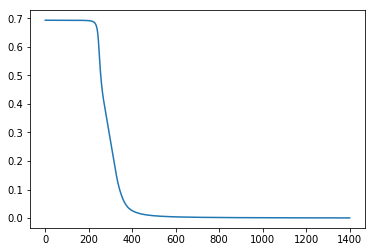

In [214]:
# Build a model with a n_h-dimensional hidden layer# with nodes 20,10
activations = ["relu", "relu", "sigmoid"]

parameters = nn_model(X_train.T, Y_train.T, 10, 5, activations, num_iterations = 1400, print_cost=True)
print("Training over")

In [215]:
# Print accuracy
predictions = predict(parameters, X_test.T, activations)
#print(predictions)
# print( Y_test.shape, predictions.shape)
# np.dot(Y_test, predictions)
print ('Accuracy: %d' % float((np.dot(predictions, Y_test) + np.dot(1-predictions, 1-Y_test))/float(Y_test.size)*100) + '%')

Accuracy: 94%


Cost after iteration 0: 0.693174
Cost after iteration 100: 0.652098
Cost after iteration 200: 0.026853
Cost after iteration 300: 0.008229
Cost after iteration 400: 0.004744
Cost after iteration 500: 0.003311
Cost after iteration 600: 0.002536
Cost after iteration 700: 0.002051
Cost after iteration 800: 0.001720
Cost after iteration 900: 0.001480
Cost after iteration 1000: 0.001298
Cost after iteration 1100: 0.001156
Cost after iteration 1200: 0.001041
Cost after iteration 1300: 0.000947
Cost after iteration 1400: 0.000868
Training over


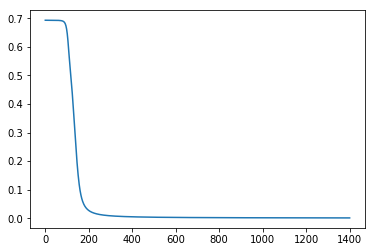

In [218]:
# Build a model with a n_h-dimensional hidden layer# with nodes 20,10
activations = ["tanh", "tanh", "sigmoid"]

parameters = nn_model(X_train.T, Y_train.T, 10, 5, activations, num_iterations = 1400, print_cost=True)
print("Training over")

In [217]:
# Print accuracy
predictions = predict(parameters, X_test.T, activations)
#print(predictions)
# print( Y_test.shape, predictions.shape)
# np.dot(Y_test, predictions)
print ('Accuracy: %d' % float((np.dot(predictions, Y_test) + np.dot(1-predictions, 1-Y_test))/float(Y_test.size)*100) + '%')

Accuracy: 93%


In [220]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train,Y_train)
print("LogisticRegression", model.score(X_test,Y_test)*100)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression 90.83333333333333
